In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd
import datetime as dt

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [30]:
#engine = create_engine("sqlite:///grocery.sqlite")#C:\Users\cjava\OneDrive\Desktop\Challenges\grocery_comparison_project\grocery.sqlite
engine = create_engine("sqlite:///C:/Users/cjava/OneDrive/Desktop/Challenges/grocery_comparison_project/grocery.sqlite")

In [31]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [32]:
# View all of the classes that automap found
Base.classes.keys()

['products', 'store']

In [33]:
# Save references to each table
products = Base.classes.products

store = Base.classes.store

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [35]:
results = session.query(products.store, products.ingredient, func.min(products.price).label('min_price')) \
        .group_by(products.store, products.ingredient) \
        .all()

results

[('Adli', 'baking powder', 2.05),
 ('Adli', 'baking soda', 0.99),
 ('Adli', 'iodized salt', 0.75),
 ('Aldi', 'baking powder', 2.05),
 ('Aldi', 'baking soda', 0.99),
 ('Aldi', 'butter', 2.99),
 ('Aldi', 'chocolate chips', 2.57),
 ('Aldi', 'eggs', 2.09),
 ('Aldi', 'flour', 2.55),
 ('Aldi', 'granulated sugar', 2.39),
 ('Aldi', 'iodized salt', 0.75),
 ('Aldi', 'milk', 1.75),
 ('Aldi', 'vanilla extract', 5.49),
 ('KROGER', 'all purpose flour', 2.69),
 ('KROGER', 'baking powder', 2.69),
 ('KROGER', 'baking soda', 1.19),
 ('KROGER', 'butter', 3.5),
 ('KROGER', 'chocolate chips', 2.69),
 ('KROGER', 'eggs', 2.49),
 ('KROGER', 'granulated sugar', 2.69),
 ('KROGER', 'iodized salt', 0.79),
 ('KROGER', 'large eggs', 2.09),
 ('KROGER', 'light brown sugar', 2.79),
 ('KROGER', 'milk', 1.99),
 ('KROGER', 'pure vanilla extract', 5.99),
 ('KROGER', 'vanilla extract', 1.99),
 ('Walmart', 'baking powder', 2.63),
 ('Walmart', 'baking soda', 0.92),
 ('Walmart', 'brown sugar', 2.34),
 ('Walmart', 'butter', 4.

In [36]:
store_min_prices = {}
for store, ingredient, min_price in results:
        if store not in store_min_prices:
            store_min_prices[store] = {}
        if ingredient not in store_min_prices[store]:
            store_min_prices[store][ingredient] = min_price
        else:
            store_min_prices[store][ingredient] += min_price
    
    # Convert the dictionary into a list of dictionaries
min_prices_list = []
for store, ingredients in store_min_prices.items():
        total_min_price = sum(ingredients.values())
        min_prices_list.append({'store': store, 'total_min_price': total_min_price})

In [37]:
min_prices_list

[{'store': 'Adli', 'total_min_price': 3.79},
 {'store': 'Aldi', 'total_min_price': 23.619999999999997},
 {'store': 'KROGER', 'total_min_price': 33.58},
 {'store': 'Walmart', 'total_min_price': 23.380000000000003}]

In [38]:
df = pd.DataFrame(min_prices_list, columns=['store', 'total_min_price'])
df = df.set_index('store')
df

,total_min_price
store,
Adli,3.79
Aldi,23.62
KROGER,33.58
Walmart,23.38


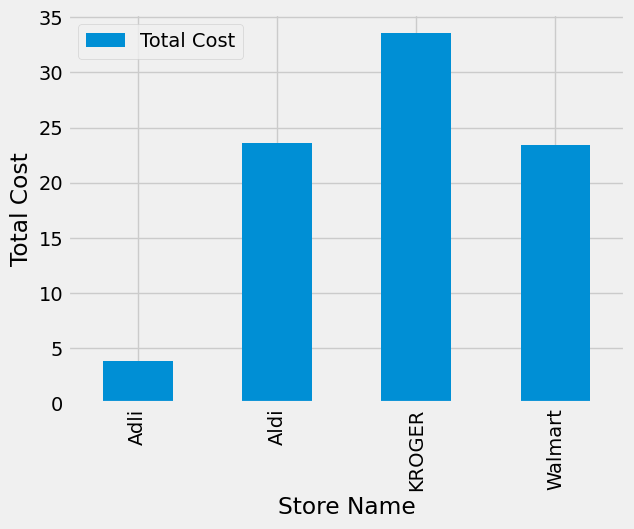

In [39]:
df.plot.bar()
plt.ylabel('Total Cost')
plt.xlabel('Store Name')
plt.legend(['Total Cost'], loc='upper left')

In [ ]:
DELETE FROM store
WHERE store = 'Adli';

In [17]:
from sqlite3 import Error

In [18]:



try:
    sql_del = cursor.execute("DELETE FROM store WHERE store = Adli")
    print("Total records affected: ", sql_del.rowcount)
    con.commit()
except Error as e:
    print(f"Oops! Something went wrong. Error: {e}")
    # reverse the change in case of error
    con.rollback()

NameError: name 'cursor' is not defined

In [ ]:
temp_obs = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-18').all()

df = pd.DataFrame(temp_obs, columns=['Tobs'])



plt.hist(df['Tobs'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'], loc='upper right')
plt.show()
